In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pyodbc
%matplotlib inline

In [15]:
# Kết nối với SQL Server
conn = pyodbc.connect('DRIVER={SQL Server};'
                      'SERVER=DESKTOP-ITNOTIB;'
                      'DATABASE=QL_HDPHONGLAB;'
                      'UID=sa;'
                      'PWD=123')

In [ ]:
# Danh sách các bảng cần trích xuất
tables = ['PHANQUYEN', 'NGUOIDUNG', 'DOIMATKHAU', 'LOAIPHONGLAB', 'TTDANGKY', 'PHONGLAB', 'PHONGBAN', 'GIANGVIEN', 'SINHVIEN', 'NSX', 'NCC',
          'LOAITTB', 'LOAIHOACHAT', 'HOACHAT', 'CT_HOACHAT', 'THIETBI', 'CT_THIETBI', 'DUNGCU', 'CT_DUNGCU', 'BANGGIA', 'PHIEUXUAT', 'CHITIETPHIEUXUAT', 'PHIEUNHAP', 'CHITIETPHIEUNHAP', 'PHIEUNHAP_KHOA']  # Thay đổi theo tên bảng của bạn

# Tạo một writer để ghi file Excel
with pd.ExcelWriter('QL_HDPHONGLAB_output.xlsx', engine='openpyxl') as writer:
    for table in tables:
        # Truy vấn dữ liệu từ từng bảng
        query = f'SELECT * FROM {table}'
        df = pd.read_sql(query, conn)
        
        # Ghi dữ liệu vào sheet với tên bảng
        df.to_excel(writer, sheet_name=table, index=False)

# Đóng kết nối
conn.close()

In [32]:
# Đọc dữ liệu từ file excel
file_path = r'C:\Users\Admin\Desktop\QL_HDPHONGLAB\QL_HDPHONGLAB_output.xlsx'  # Thay đổi đường dẫn đến file Excel của bạn
sheet_name = 'THONGTIN_HOACHAT'  # Tên sheet mà bạn muốn đọc

try:
    # Đọc dữ liệu từ sheet
    df_hoachat = pd.read_excel(file_path, sheet_name=sheet_name)
    print("Dữ liệu đã được đọc thành công:")
    print(df)

except FileNotFoundError:
    print(f"File không tồn tại: {file_path}")

except ValueError as e:
    print(f"Giá trị không hợp lệ: {e}")

except Exception as e:
    print(f"Có lỗi xảy ra: {e}")

Dữ liệu đã được đọc thành công:
   MAPN_KHOA MAHC_CNTP MATB_CNTP MADC_CNTP   NGAYNHAP  \
0          1      HC01      TB01      DC01 2023-08-23   
1          2      HC02      TB02      DC02 2023-09-23   
2          3      HC03      TB03      DC03 2023-10-23   

                       NOIDUNG  NGUOIKIEMDUYET  GHICHU  
0  NHẬP TRANG THIẾT BỊ VỀ KHOA  HUỲNH VĂN TÙNG  ABCXYZ  
1  NHẬP TRANG THIẾT BỊ VỀ KHOA  HUỲNH VĂN TÙNG  ABCXYZ  
2  NHẬP TRANG THIẾT BỊ VỀ KHOA  HUỲNH VĂN TÙNG  ABCXYZ  


In [33]:
# Xử lý và làm sạch bảng hoá chất (tạo df copy)
df_copy_hoachat = df_hoachat.copy()
df_copy_hoachat.head(5)

,STT,MAHC,TENHC,CASNO,LUONGNHAP,LUONGXUAT,LUONGTON,GIANHAP,NGAYNHAP,NGAYHETHAN,XUATXU
0,1,HC01,KALI HIDROXIT,SZHA0199,120,10,110,150000,2023-01-01,2023-01-01,HÀN QUỐC
1,2,HC02,NATRI HIDROXIT,JHXHJS112,110,10,100,120000,2023-02-02,2023-02-02,TRUNG QUỐC
2,3,HC03,BARI HIDROXIT,NSHJ10293,100,10,90,110000,2023-03-03,2023-03-03,NHẬT BẢN
3,4,HC04,AMON CLORUA,JDHHSK123,90,10,80,130000,2023-04-04,2023-04-04,THÁI LAN
4,5,HC05,AMON SUNFAT,DHSG1872,150,10,140,140000,2023-05-05,2023-05-05,SINGAPORE


In [34]:
df_copy_hoachat.dtypes

STT                    int64
MAHC                  object
TENHC                 object
CASNO                 object
LUONGNHAP              int64
LUONGXUAT              int64
LUONGTON               int64
GIANHAP                int64
NGAYNHAP      datetime64[ns]
NGAYHETHAN    datetime64[ns]
XUATXU                object
dtype: object

In [35]:
# Thêm cột tổng giá khi nhập số lượng lớn hoá chất
df_copy_hoachat['TONGGIA'] = df_copy_hoachat['GIANHAP'].astype('int64') * df_copy_hoachat['LUONGNHAP'].astype('int64')
df_copy_hoachat.head(5)

,STT,MAHC,TENHC,CASNO,LUONGNHAP,LUONGXUAT,LUONGTON,GIANHAP,NGAYNHAP,NGAYHETHAN,XUATXU,TONGGIA
0,1,HC01,KALI HIDROXIT,SZHA0199,120,10,110,150000,2023-01-01,2023-01-01,HÀN QUỐC,18000000
1,2,HC02,NATRI HIDROXIT,JHXHJS112,110,10,100,120000,2023-02-02,2023-02-02,TRUNG QUỐC,13200000
2,3,HC03,BARI HIDROXIT,NSHJ10293,100,10,90,110000,2023-03-03,2023-03-03,NHẬT BẢN,11000000
3,4,HC04,AMON CLORUA,JDHHSK123,90,10,80,130000,2023-04-04,2023-04-04,THÁI LAN,11700000
4,5,HC05,AMON SUNFAT,DHSG1872,150,10,140,140000,2023-05-05,2023-05-05,SINGAPORE,21000000


In [36]:
# Thêm cột tháng nhập hoá chất
get_month_hc = lambda sample_ngay:sample_ngay.split('-')[1]
df_copy_hoachat['THANGNHAP'] = df_copy_hoachat['NGAYNHAP'].astype(str).apply(get_month_hc)
df_copy_hoachat.head()

,STT,MAHC,TENHC,CASNO,LUONGNHAP,LUONGXUAT,LUONGTON,GIANHAP,NGAYNHAP,NGAYHETHAN,XUATXU,TONGGIA,THANGNHAP
0,1,HC01,KALI HIDROXIT,SZHA0199,120,10,110,150000,2023-01-01,2023-01-01,HÀN QUỐC,18000000,01
1,2,HC02,NATRI HIDROXIT,JHXHJS112,110,10,100,120000,2023-02-02,2023-02-02,TRUNG QUỐC,13200000,02
2,3,HC03,BARI HIDROXIT,NSHJ10293,100,10,90,110000,2023-03-03,2023-03-03,NHẬT BẢN,11000000,03
3,4,HC04,AMON CLORUA,JDHHSK123,90,10,80,130000,2023-04-04,2023-04-04,THÁI LAN,11700000,04
4,5,HC05,AMON SUNFAT,DHSG1872,150,10,140,140000,2023-05-05,2023-05-05,SINGAPORE,21000000,05


In [37]:
# Di chuyển các cột mới thêm lên trước để quản lý
moving_col_tonggia = df_copy_hoachat.pop('TONGGIA')
df_copy_hoachat.insert(8, 'TONGGIA', moving_col_tonggia)

moving_col_thangnhap = df_copy_hoachat.pop('THANGNHAP')
df_copy_hoachat.insert(10, 'THANGNHAP', moving_col_thangnhap)
df_copy_hoachat.head()

,STT,MAHC,TENHC,CASNO,LUONGNHAP,LUONGXUAT,LUONGTON,GIANHAP,TONGGIA,NGAYNHAP,THANGNHAP,NGAYHETHAN,XUATXU
0,1,HC01,KALI HIDROXIT,SZHA0199,120,10,110,150000,18000000,2023-01-01,01,2023-01-01,HÀN QUỐC
1,2,HC02,NATRI HIDROXIT,JHXHJS112,110,10,100,120000,13200000,2023-02-02,02,2023-02-02,TRUNG QUỐC
2,3,HC03,BARI HIDROXIT,NSHJ10293,100,10,90,110000,11000000,2023-03-03,03,2023-03-03,NHẬT BẢN
3,4,HC04,AMON CLORUA,JDHHSK123,90,10,80,130000,11700000,2023-04-04,04,2023-04-04,THÁI LAN
4,5,HC05,AMON SUNFAT,DHSG1872,150,10,140,140000,21000000,2023-05-05,05,2023-05-05,SINGAPORE


C:\Users\Admin\AppData\Local\Temp\ipykernel_11308\2314092340.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  soluong_thang_list = df_copy_hoachat.groupby('THANGNHAP').sum()['LUONGNHAP']


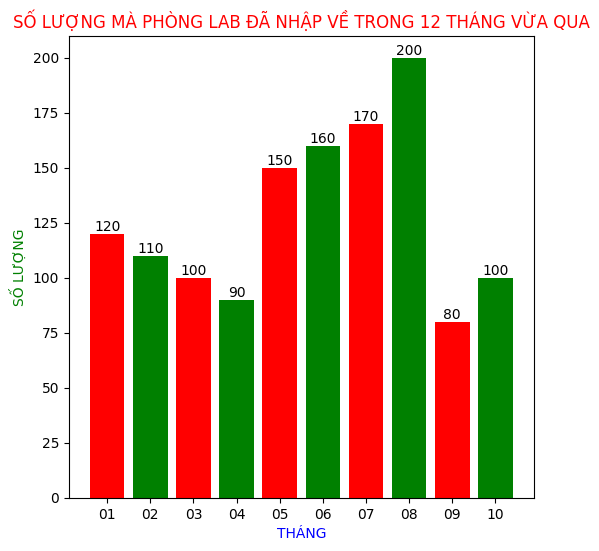

In [38]:
# Trực quan hoá dữ liệu (Số lượng nhập mà phòng lab đã nhập về trong 12 tháng vừa qua)
soluong_thang_list = df_copy_hoachat.groupby('THANGNHAP').sum()['LUONGNHAP']
soluong_thang_list.max

sp_sl_thang = [soluong for soluong, thang in
               soluong_thang_list.items()]
fig, ax = plt.subplots(figsize=(6,6))
bar_container = plt.bar(x=sp_sl_thang, height=soluong_thang_list, color=['red', 'green'])
plt.xticks(sp_sl_thang)
plt.title('SỐ LƯỢNG MÀ PHÒNG LAB ĐÃ NHẬP VỀ TRONG 12 THÁNG VỪA QUA', color='red')
plt.xlabel('THÁNG', color='blue')
plt.ylabel('SỐ LƯỢNG', color='green')
ax.bar_label(bar_container)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_11308\1079600554.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  soluong_hoachat_list = df_copy_hoachat.groupby('TENHC').sum()['LUONGTON']
C:\Users\Admin\AppData\Local\Temp\ipykernel_11308\1079600554.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sp_sl, rotation= 90, size= 8)


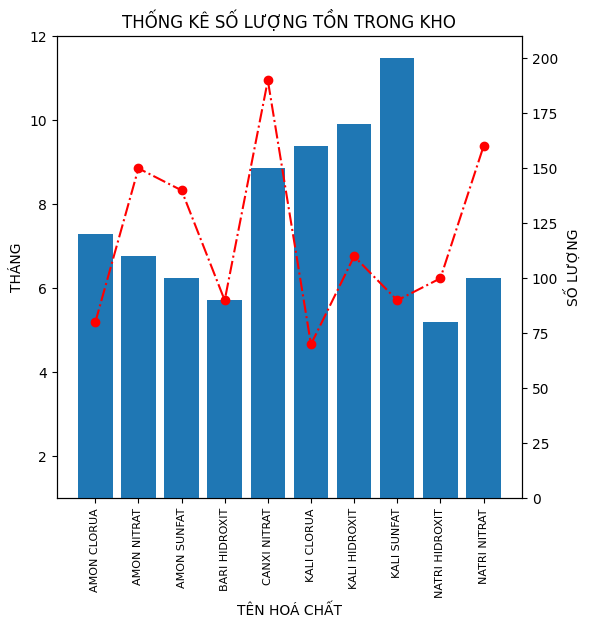

In [39]:
# Thống kê số lượng tồn còn trong kho
soluong_hoachat_list = df_copy_hoachat.groupby('TENHC').sum()['LUONGTON']
soluong_hoachat_list.max

sp_sl = [soluong for soluong, id in
         soluong_hoachat_list.items()]

x = sp_sl
y1 = soluong_thang_list
y2 = soluong_hoachat_list
fig, ax1 = plt.subplots(figsize=(6,6))
ax2 = ax1.twinx()

bar_container_thang = plt.bar(x= x, height= y1)
bar_container_mats = plt.plot(x, y2, 'r', marker= 'o', linestyle= 'dashdot')

ax1.set_xticklabels(sp_sl, rotation= 90, size= 8)
ax1.set(xlabel= 'TÊN HOÁ CHẤT', ylabel= 'THÁNG', ylim=(1,12))
ax2.set_ylabel('SỐ LƯỢNG')
plt.title('THỐNG KÊ SỐ LƯỢNG TỒN TRONG KHO')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_11308\707284931.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  xuatsu = df_copy_hoachat.groupby('XUATXU').sum()['LUONGNHAP']


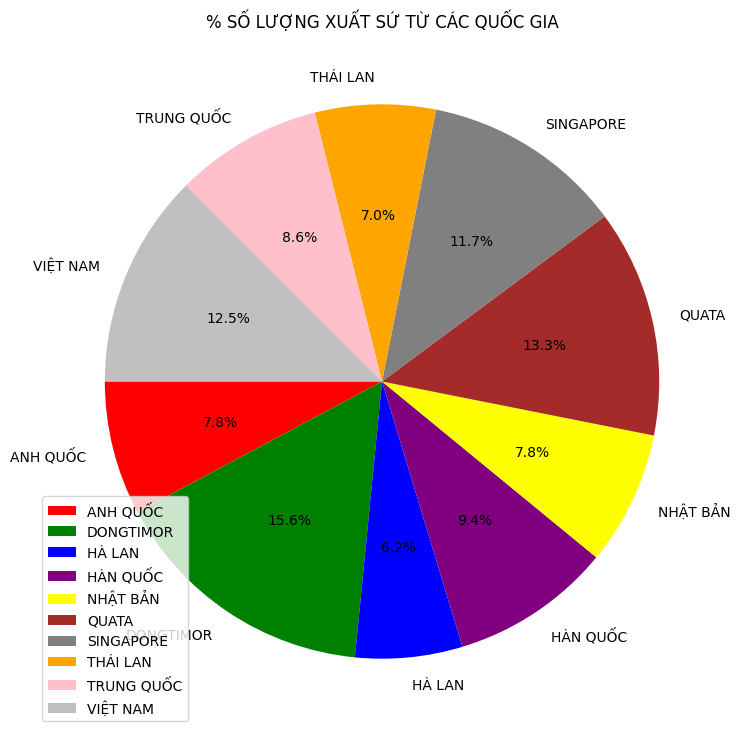

In [41]:
# % Số lượng nhập hàng có xuất sứ từ các quốc gia
xuatsu = df_copy_hoachat.groupby('XUATXU').sum()['LUONGNHAP']
xuatsu.max

sums = xuatsu
fig, ax = plt.subplots(figsize=(9,9))
plt.title('% SỐ LƯỢNG XUẤT SỨ TỪ CÁC QUỐC GIA')
plt.axis()
plt.pie(
    sums,
    labels= sums.index,
    colors=['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'gray', 'orange', 'pink', 'silver', 'white'],
    autopct= '%1.1f%%', # Hiển thị số phần trăm
    startangle=180
)
plt.legend()
plt.show()

In [43]:
# Tổng giá nhập vào dựa theo từng tháng
fig = px.area(
    df_copy_hoachat,
    x="THANGNHAP",
    y="TONGGIA",
    color="TENHC",
    line_group="XUATXU",
    labels={
        "THANGNHAP":"THÁNG",
        "TONGGIA":"TỔNG GIÁ",
        "TENHC":"HOÁ CHẤT",
        "XUATXU":"XUẤT SỨ"
})
fig.show()